(qhw2)=
# Tutorial 2 - Continuous variables or the quantum harmonic oscillator

In the [first tutorial](qhw1) we saw a simple description of the qubit, which is quite often as far as hardware discussions go. Qubits are pretty awesome for the solution to a substantial amount of binary problems. However, the translation of continouous variables (CV) onto qubit is most of the time a rather sad moment. But to simply solve a problem with CV on a quantum system, there is no fundamental reason in going through a qubit representation. 

We will examplify this at the widely discussed problem of the harmonic oscillator. This also lays the groundwork for the discussion of such hardware systems like photonic quantum systems, cold atoms or even the readout of qubit based hardware like trapped ions or superconducting devices.

## The classical harmonic oscillator

Within physics we love to describe the evolution of a system with differential equations up to second order. The absolute classic is a particle of mass $m$ that is moving in a harmonic potential. We describe its position as $x$. Its equation of motion is then:

$$
\ddot{x} +\omega^2 x = 0
$$

The solutions are then just oscillatory solutions:

$$
x(t) = a \cos(\omega t)+ b \sin(\omega t)
$$

$$
\dot{x}(t) = -a\omega \sin(\omega t)+ b\omega \cos(\omega t)
$$

$$
\ddot{x}(t) = -\omega^2 x(t)
$$


The two prefactors are are fully determined by:

- The initial speed of the particle $\dot{x}(t=0) = v_0$, or its associated momentum $p = mv$.
- The initial position of the particle $x(t=0) = x_0$.

This results in:

$$
x(t=0) = a  = x_0
$$

$$
\dot{x}(t=0) = b\omega = v_0
$$


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi


Text(0, 0.5, 'velocity $v$')

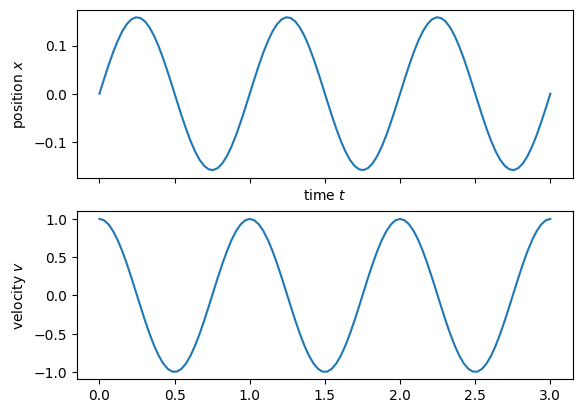

In [10]:
# steepness of the potential
m = 1;
omega = 2*np.pi*1;

# initial conditions
x0 = 0;
v0 = 1;

tlin = np.linspace(0,3,100);

xt = x0*np.cos(omega*tlin)+v0/omega*np.sin(omega*tlin);
vt = -x0*omega*np.sin(omega*tlin)+v0*np.cos(omega*tlin);

f, (ax1,ax2) = plt.subplots(2,1, sharex=True)
ax1.plot(tlin, xt)
ax2.plot(tlin, vt)
ax1.set_xlabel('time $t$')
ax1.set_ylabel('position $x$')
ax2.set_ylabel('velocity $v$')

We learn a few things from this example:
- The position and momentum are independent variables of the problem.
- If we cannot solve the equations of motion analytically or numerically, we have to resort to an *'experiment'* that solves the differential equation for us. However, every *'experiment'* will only solve one eom for one set of parameters for us. 

### Random initial conditions

We have seen that the system might be solved analytically, however this might hit some problems for more complex problems. Then we have to investigate the solutions experimentally. For this work, we will prepare the system with some fidelity in some initial state. We assume: 

- We have some precision $\Delta x$ on the initial state preparation at $x_0$. 
- We have some precision $\Delta v$ on the initial state preparation at $v_0$.

Let us just assume a gaussian  for simplicity. To describe this initial state we can then use the probability distribution $P_0(x)$ and $P_0(v)$. For a finite grid size it means that we describe the initial state by a vector whose a elements are positive real numbers between 0 and 1 with the normalization condition:

$$
\sum p_i = 1
$$

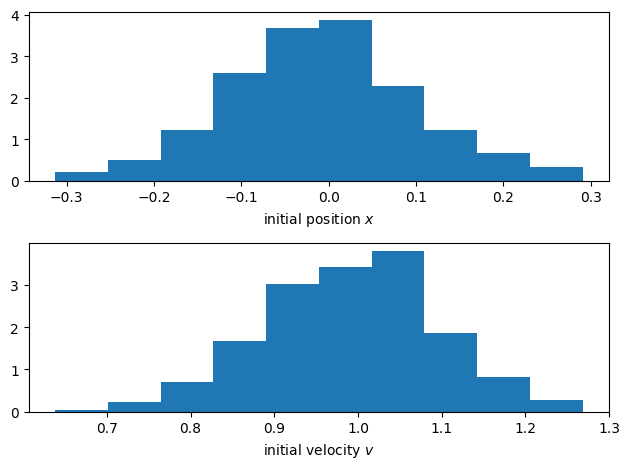

In [11]:
v0 = 1;dv = 0.1;
x0 = 0; dx = 0.1;

Px = np.random.normal(x0, dx, 500)
Pv = np.random.normal(v0, dv, 500)

f, (ax1,ax2) = plt.subplots(2,1)
ax1.hist(Px, density=True)
ax2.hist(Pv, density=True)
ax1.set_xlabel('initial position $x$')
ax2.set_xlabel('initial velocity $v$')
f.tight_layout()

\And depending on these initial conditions, we will obtain some final distributions $P(x_f)$ and $P(v_f)$

Text(0, 0.5, 'velocity $v$')

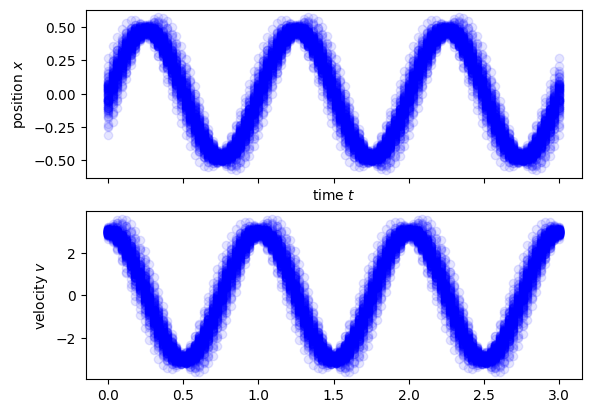

In [12]:
# initial conditions
v0 = 3;dv = 0.1;
x0 = 0; dx = 0.1;
Ntries = 100;

x0s = np.random.normal(x0, dx, Ntries);
v0s = np.random.normal(v0, dv, Ntries);


tlin = np.linspace(0,3,100);

xts = np.zeros((100, Ntries));
vts = np.zeros((100, Ntries));
for ii in np.arange(Ntries):
    xts[:,ii] = x0s[ii]*np.cos(omega*tlin)+v0s[ii]/omega*np.sin(omega*tlin);
    vts[:,ii] = -x0s[ii]*omega*np.sin(omega*tlin)+v0s[ii]*np.cos(omega*tlin);

f, (ax1,ax2) = plt.subplots(2,1, sharex=True)
ax1.plot(tlin, xts, 'bo', alpha = 0.1)
ax2.plot(tlin, vts, 'bo', alpha = 0.1)
ax1.set_xlabel('time $t$')
ax1.set_ylabel('position $x$')
ax2.set_ylabel('velocity $v$')

quite importantly we can only test one set of initial conditions for each trajectory. The particle cannot be at several positions at the same time. With quantum  mechanics, we can now look into a system where this restriction gets lifted.

## Quantum  harmonic oscillator

### Finding the Hamiltonian

To find the quantum mechanical analog to some classical equations of motion, we must  re-express them in terms of a **Lagrangien** $L$. It is a functional, which depends on the position $x$ and the independent velocity $\dot{x}$. The equations of motion of the particle are then given as:

$$
\frac{d}{dt}\left(\frac{\partial L}{\partial \dot{x}}\right) = \frac{\partial L}{\partial x}
$$

For the harmonic oscillator we have the Lagrangien:

$$
L_{h.o.} = \frac{m\dot{x}^2}{2}-\frac{m\omega^2}{2}x^2
$$

We can then identify from it several fundamental quantities:
- the kinetic energy of the particle $T = \frac{m\dot{x}^2}{2}$.
- Its potential energy $V = \frac{m\omega^2}{2}x^2$.
- Its total energy $E = T + V$

However, for the translation to quantum mechanics it is even more important that the Lagrangien allows us to define the *conjugate momentum* to the position:

$$
p = \frac{\partial L}{\partial \dot{x}}
$$

We then obtain the classical Hamiltonian for the system, which is:

$$
H = \dot{x} p - L
$$

$$
H_{h.o.} = \frac{p^2}{2m}+\frac{m\omega^2}{2}x^2
$$

We have now assembled all ingridients to 'quantize' the system.
- We know the Hamiltonian.
- We know its conjugate variables. 



The system is then described by the Hamiltonian:

$$
\hat{H}_{H.O.} = \frac{\hat{p}^2}{2m} + \frac{m\omega^2}{2}\hat{x}^2
$$

and the commutation relationship:

$$
[\hat{x}, \hat{p}] = i\hbar
$$

$$
[\hat{x}, \hat{p}] \equiv \hat{x} \hat{p} - \hat{p}\hat{x}
$$

The fact that the commutators are not disappearing is telling us that for any quantum system we cannot observe its position and momentum to arbitrary position at the same time.  A few notes before we continue:

- In the quantum mechanical system we can still have completely continouous observables $\hat{x}$ and $\hat{p}$. Nothing has changed here. 
- As we will see we now have a quantized energy spectrum, which is a fundamental change to quantum mechanics.
- As we will also see, we can launch the system in a superposition of different initial conditions, which are then explored in a parallel fashion.

### Time evolution

This set of equations allows us to obtain the equations of motion through the Heisenberg equation as:

$$
\frac{d \hat{x}}{dt} = \frac{i}{\hbar}[\hat{H}, \hat{x}]
$$

$$
\frac{d \hat{p}}{dt} = \frac{i}{\hbar}[\hat{H}, \hat{p}]
$$

For the position the harmonic oscillator we obtain then:

$$
\frac{d \hat{x}}{dt} = \frac{i}{\hbar}[\hat{H}_{H.O.}, \hat{x}]
$$

$$
= \frac{i}{\hbar}[\frac{p^2}{2m}, \hat{x}]
$$

$$
= \frac{\hat{p}}{m}
$$

and for its momentum we obtain:

$$
\frac{d \hat{p}}{dt} = \frac{i}{\hbar}[\hat{H}_{H.O.}, \hat{p}]
$$

$$
= \frac{i}{\hbar}[\frac{m\omega^2}{2} \hat{x}^2, \hat{p}]
$$

$$
= -m\omega^2 \hat{x}
$$

So we are basically back at the set of differential equations, which looks similiar to what we had previously, except of th funny operator symbol on top of $x$ and $p$. For all practical purposes you might see these operators as some massive matrices acting on some kind complex vectors $|\psi\rangle$. A few comments here:

- To solve the problem you have to numerically solve the time evolution of the massive matrix  and not only of one variable. One example of quantum paralellism.
- The state vectors contain the initial state as we will see in a moment.
- To solve the problem we typically decompose the matrices into the eigenstates and eigenvalues, which are then the energies.
- If you want to solve the problem analytically it is most common to work with the Schrödinger picture, but it looks a bit different on first sight and we will just leave it to the appendix for the moment.

### Initial conditions

In the quantum mechanical system we do not describe the initial conditions through its probability distributions anymore, but rather the wavefunction $|\psi_0\rangle$. 

- Imagine that we are now observing the position of the particle. Each outcome is noted $|x_i \rangle$. It is basically the points on the grid with a spacing set by the resolution of the detector or the size of my quantum computer etc. This discretization is just for a simpler discussion, you can also just replace the sums, by integrals if you would like.
- To each outcome we associate some complex number $\psi(x_i)$ to describe the initial condition.
- We obtain the probability distribution $P(x_i) = |\psi(x_i)|^2$

We then typically write the initial state as:

$$
|\psi_{init}\rangle = \int dx~\psi(x) |x\rangle\langle x|
$$

Or if you prefer the discrete version:

$$
|\psi_{init}\rangle = \sum_i \alpha_i|x_i\rangle
$$

So we can describe the initial state, by a vector whose entries are complex numbers  and which fulfill the normalization conditions:

$$
\int dx~ |\psi(x)|^2 = 1
$$

For conciseness it is always nice to just use a Gaussian with width $\sigma_x$

Text(0, 0.5, '$\\psi$')

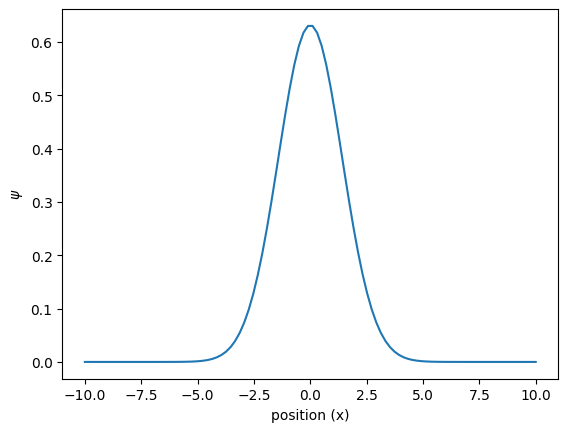

In [13]:
xlin = np.linspace(-10,10, 100);
sigmax = 1;
# initial shape
psiInit = 1/(2*np.pi*sigmax**2)**(1/4)*np.exp(-xlin**2/4/sigmax**2);

# normalization
np.trapz(psiInit**2, xlin)

f, ax = plt.subplots()
ax.plot(xlin, psiInit)
ax.set_xlabel('position (x)')
ax.set_ylabel('$\psi$')

But what about the momentum distribution ? In the same way as we were able to assign some values to the initial distribution of the position, we can associate some distribution for the distribution in momentum:

- We will note every possible outcome for position as $|k_j \rangle$ 
- We will associate its components with some complex value $\beta_j$ 

We then typically write the initial state as:

$$
|\psi_{init}\rangle = \int dk~\psi(k) |k\rangle\langle k|
$$

Or if you prefer the discrete version:

$$
|\psi_{init}\rangle = \sum_j \beta_j|k_j\rangle
$$

Once again the entries are complex numbers and fulfill the normalization condition:

$$
\int dk~ |\psi(k)|^2 = 1
$$

The two representations are not independent. They are connected through the Fourier transform:

$$
\psi(k) = \frac{1}{\sqrt{2\pi}}\int dx \psi(x) e^{-ikx}
$$

For a Gaussian of width $\sigma_x$ in position space, this results in a gaussian of width $\sigma_k = 1/2\sigma_x$

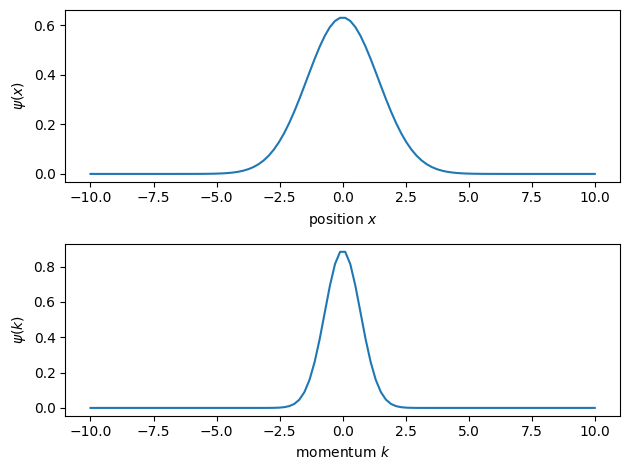

In [14]:
xlin = np.linspace(-10,10, 100);
klin = np.linspace(-10,10, 100);
sigmax = 1;
sigmak = 1/2/sigmax;
# initial shape
psiInit_x = 1/(2*np.pi*sigmax**2)**(1/4)*np.exp(-xlin**2/4/sigmax**2);
psiInit_k = 1/(2*np.pi*sigmak**2)**(1/4)*np.exp(-klin**2/4/sigmak**2);

# normalization
np.trapz(psiInit_x**2, xlin)

f, (ax1,ax2) = plt.subplots(2,1)
ax1.plot(xlin, psiInit_x)
ax1.set_xlabel('position $x$')
ax1.set_ylabel('$\psi(x)$')
ax2.plot(klin, psiInit_k)
ax2.set_xlabel('momentum $k$')
ax2.set_ylabel('$\psi(k)$')
f.tight_layout()

It is of fundamental importance to recognize that we can now choose initial conditions in which the particle is in several initial conditions at the same time. As an example it is perfectly valid to have a particle which is centered at zero, but is in a super position of opposite velocities.

1.0000000000000124


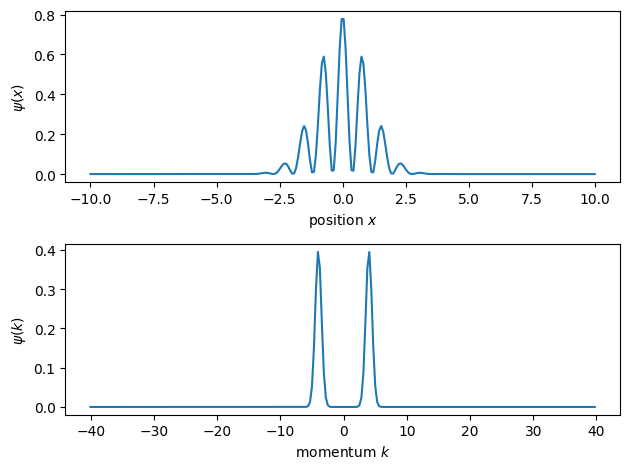

In [15]:
import scipy.fftpack as ft

Nx = 256;Nk = 100;
xlin = np.linspace(-10,10, Nx);

# size of the wavepackage
sigmax = 1; 
#initial velocity
k0 = 4;

# initial shape
psiInit_x = 1/(2*np.pi*sigmax**2)**(1/4)*np.exp(-xlin**2/4/sigmax**2)*1/np.sqrt(2)*(np.exp(1j*k0*xlin)+np.exp(-1j*k0*xlin));

# normalization
Nx = np.trapz(abs(psiInit_x)**2, xlin);
print(Nx)


# get its Fourier transform
dx = np.diff(xlin).mean()
k_fft = ft.fftfreq(xlin.size,d = dx)
k_fft = 2*np.pi*ft.fftshift(k_fft)
dk = np.diff(k_fft).mean()

psiInit_fft = np.fft.fftshift(np.fft.fft(psiInit_x));
# normalization
Nk = np.trapz(abs(psiInit_fft)**2, k_fft);
psiInit_fft = psiInit_fft/np.sqrt(Nk)

f, (ax1,ax2) = plt.subplots(2,1)
ax1.plot(xlin, abs(psiInit_x)**2)
ax1.set_xlabel('position $x$')
ax1.set_ylabel('$\psi(x)$')
#ax2.plot(klin, psiInit_k)
ax2.plot(k_fft, abs(psiInit_fft)**2)
ax2.set_xlabel('momentum $k$')
ax2.set_ylabel('$\psi(k)$')
f.tight_layout()

## Connection the dots

We have now seen how to define the initial conditions and how obtain the time evolution of momentum and position. To connect the two of them, we 
have to look into expectation values, which are defined as:
$$
x(t) = \langle\psi_0| \hat{x}(t) |\psi_0\rangle
$$
$$
p(t) = \langle\psi_0| \hat{p}(t) |\psi_0\rangle
$$

This also allows us to obtain some typical classical equations of motion:

$$
\langle\psi_0|\frac{d \hat{x}}{dt} |\psi_0\rangle = \frac{\langle\psi_0|\hat{p}|\psi_0\rangle}{m}
$$

and for its momentum we obtain:

$$
\langle\psi_0|\frac{d \hat{p}}{dt} |\psi_0\rangle = -m\omega^2 \langle\psi_0|\hat{x}|\psi_0\rangle
$$


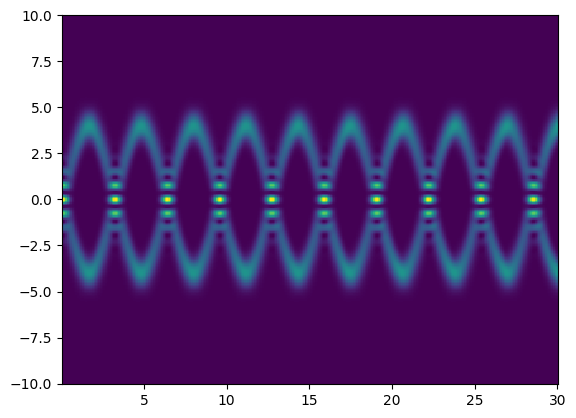

In [16]:
from numpy import linalg as LA

Nx = 256;
xvec = np.linspace(-10,10, Nx);

omega = 1; m = 1; hbar = 1;

# kinetic energy
dx = np.diff(xvec).mean()

dia = -2*np.ones(Nx)
offdia = np.ones(Nx-1)
d2grid = np.mat(np.diag(dia,0) + np.diag(offdia,-1) + np.diag(offdia,1))/dx**2
d2grid[0,:]=0
d2grid[Nx-1,:]=0

Ekin = -hbar**2/(2*m)*d2grid
Ekin

# potential energy
x = np.mat(np.diag(xvec,0))
Vx = m*omega**2/2*xvec**2;
Epot = np.mat(np.diag(Vx,0))

H =  Ekin + Epot

# diagonalization
w, v = LA.eig(H)
# sort it such that things look nice later
sortinds = np.argsort(w)
EigVecs = v[:,sortinds]
EigVals = w[sortinds]

# size of the wavepackage
sigmax = 1; 

#initial velocity
k0 = 4;

# initial shape
psiInit_x = 1/(2*np.pi*sigmax**2)**(1/4)*np.exp(-xlin**2/4/sigmax**2)*1/np.sqrt(2)*(np.exp(1j*k0*xlin)+np.exp(-1j*k0*xlin));
#psiInit_x = 1/(2*np.pi*sigmax**2)**(1/4)*np.exp(-xlin**2/4/sigmax**2)*np.exp(1j*k0*xlin);
#psiInit_x = 1/(2*np.pi*sigmax**2)**(1/4)*np.exp(-xlin**2/4/sigmax**2)*np.exp(-1j*k0*xlin);
psiInit_x = np.mat(psiInit_x).T
#transform to matrix
EigVals = np.mat(EigVals).T

# EigVecs contains the Eigenvectors as columns, 
# conjugate transpose times Psi0 calculates the scalar product
# of every energy-eigenvector with Psi0 (yields the representation in the energy-eigenbasis)
Psi0Eig = EigVecs.H * psiInit_x

tmax = 30
NSteps = 300
dt = tmax/NSteps
meanx = np.zeros(NSteps)
xsq = np.zeros(NSteps)
ts = np.zeros(NSteps)
psi_t = 1j*np.zeros((Nx, NSteps))
n_t = np.zeros((Nx, NSteps))
t = 0
for k in range(0,NSteps):
    
    # Time evolution is just a phase evolution in the energy eigenbasis
    PsitEig = np.multiply( np.exp(-1j*EigVals/hbar*t),Psi0Eig )
    
    # Transform back to the grid representation (calculate the time-evolved 
    # superposition of energy-eigenstates)
    Psit = EigVecs*PsitEig
    psi_t[:,k] = Psit.flatten();
    n_t[:,k] = np.array(np.abs(Psit.flatten()))**2;
    # calculate the mean position
    meanx[k] = np.real(Psit.H*x*Psit);
    xsq[k] = np.real(Psit.H*x**2*Psit);
    t = t+dt
    ts[k]=t

xstd = np.sqrt(xsq-meanx**2);

f, ax = plt.subplots()
ax.pcolormesh(ts, xvec, n_t);

## So what is discrete or quanitized in the quantum harmonic oscillator ?

We have seen now that one fundamental difference between the classical and the quantum implementation of the harmonic oscillator is the possibility of superpositions in the initial state. This did not change that the observables are perfectly continuous variables. However the dramatic change happens in the accessible energy levels.

### Energies for the classical harmonic oscillator


For the classical harmonic oscillator the energy is directly linked to the speed and the position of the particle and it is given as:

$$
E_{h.o.} = \frac{mv^2}{2}+\frac{m\omega^2}{2}x^2
$$

So it can take any value. For the quantum system this is dramatically different. The energies are quantized now and given by

$$
E_n = \hbar \omega(n+1/2)\mbox{ with }n\in \mathbb{N}
$$

So this thing is now discrete in the quantum version of the harmonic oscillator, not more and not less.

## Summary

In this tutorial we have seen the description of the quantum harmonic oscillator, how it connects to certain problems and how to solve this numerically. In the [third tutorial](qhw3), we will see how it is used to trap and cool ions, which are one of the leading quantum computation platforms.